In [1]:
import pandas as pd
path1 = "D:/TON IOT/Processed_datasets/Processed_datasets/Processed_Linux_dataset/linux_disk_1.csv"
path2 = "D:/TON IOT/Processed_datasets/Processed_datasets/Processed_Linux_dataset/linux_disk_2.csv"
linux_disk1 = pd.read_csv(path1)
linux_disk2 = pd.read_csv(path2)
print(linux_disk1.shape)
print(linux_disk2.shape)
linux_disk = pd.concat([linux_disk1, linux_disk2])

print(linux_disk.shape)
linux_disk.head()


C:\Users\mashr\AppData\Local\Temp\ipykernel_2532\3775802285.py:4: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  linux_disk1 = pd.read_csv(path1)
C:\Users\mashr\AppData\Local\Temp\ipykernel_2532\3775802285.py:5: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  linux_disk2 = pd.read_csv(path2)


(1000000, 9)
(927361, 9)
(1927361, 9)


,ts,PID,RDDSK,WRDSK,WCANCL,DSK,CMD,label,type
0,1554218915,3197,148.2,37340,12328,0.22,firefox,0,normal
1,1554218920,2327,32824.0,688,4,0.04,init,0,normal
2,1554218925,2797,23468.0,7416,6152,0.04,nautilus,0,normal
3,1554218930,2801,3612.0,14320,0,0.02,tracer-store,0,normal
4,1554218935,2993,5184.0,11152,0,0.02,zeitgeist-fts,0,normal


In [2]:
linux_disk.drop('ts', axis = 1, inplace=True)
linux_disk.drop('type', axis = 1, inplace= True)

linux_disk.head()

,PID,RDDSK,WRDSK,WCANCL,DSK,CMD,label
0,3197,148.2,37340,12328,0.22,firefox,0
1,2327,32824.0,688,4,0.04,init,0
2,2797,23468.0,7416,6152,0.04,nautilus,0
3,2801,3612.0,14320,0,0.02,tracer-store,0
4,2993,5184.0,11152,0,0.02,zeitgeist-fts,0


In [3]:
linux_disk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1927361 entries, 0 to 927360
Data columns (total 7 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   PID     int64 
 1   RDDSK   object
 2   WRDSK   object
 3   WCANCL  object
 4   DSK     object
 5   CMD     object
 6   label   int64 
dtypes: int64(2), object(5)
memory usage: 117.6+ MB


In [4]:
linux_disk.isnull().sum().sum()

0

In [5]:
linux_disk['RDDSK'].isnull().sum()

0

In [ ]:
# To see all the unique values
# unique = linux_disk['RDDSK'].unique()

# for values in unique:
#     print(values, end=', ')

# Replacing 'K'(for e.g 150K as 150000) and 'M'(for e.g 56M to 56000000)

In [7]:
linux_disk['RDDSK'].replace('K', '000', regex=True, inplace= True)
linux_disk['RDDSK'].replace('M', '000000', regex=True, inplace= True)

In [8]:
linux_disk['RDDSK']

0           148.2
1         32824.0
2         23468.0
3          3612.0
4          5184.0
           ...   
927356        0.0
927357        0.0
927358        0.0
927359        0.0
927360        0.0
Name: RDDSK, Length: 1927361, dtype: object

In [ ]:
unique = linux_disk['RDDSK'].unique()

for values in unique:
    print(values, end=', ')

In [10]:
linux_disk['RDDSK'] = linux_disk['RDDSK'].astype(float)

In [11]:
linux_disk['RDDSK'].isnull().sum()

0

In [12]:
linux_disk['RDDSK']

0           148.2
1         32824.0
2         23468.0
3          3612.0
4          5184.0
           ...   
927356        0.0
927357        0.0
927358        0.0
927359        0.0
927360        0.0
Name: RDDSK, Length: 1927361, dtype: float64

In [13]:
linux_disk['RDDSK'].value_counts()

0.0         1917465
4.0            1677
32.0            592
8.0             337
12.0            275
             ...   
692000.0          1
572000.0          1
540000.0          1
114.9             1
1720.0            1
Name: RDDSK, Length: 1484, dtype: int64

In [14]:
#Also has 'K's as 'M's

# unique = linux_disk['WRDSK'].unique()

# for values in unique:
#     print(values, end=', ')

In [15]:
#Getting rid of the 'K's and 'M's
linux_disk['WRDSK'].replace('K', '000', regex=True, inplace= True)
linux_disk['WRDSK'].replace('M', '000000', regex=True, inplace= True)

In [16]:
# Dealing with very small errors in the dataset
linux_disk.loc[linux_disk['WRDSK']== '49.9 1', 'WRDSK'] = '49.91'
linux_disk.loc[linux_disk['WRDSK']== '-', 'WRDSK'] = '-1'


In [17]:
linux_disk['WRDSK'] = linux_disk['WRDSK'].astype(float)

In [18]:
#Also has 'K's as 'M's

unique = linux_disk['WCANCL'].unique()

for values in unique:
    print(values, end=', ')

12328, 4, 6152, 0, 20, 420, 36, 16, 4256, 5364, 5244, 5788, 768, 904, 3332, 4752, 4840, 5284, 56, 6616, 32, 6772, 127.9, 72676.0, 2912.0, 912.0, 180.0, 73768.0, 12.0, 8.0, 3600, 9024, 52, 7068, 3772, 40, 28, 2200.0, 1964.0, 2.5, 3932.0, 0, 4, 8, 16, 6940, 24, 28, 36, 7020, 12, 48, 60, 500, 40, 32, 6828, 1584, 5892K, 17784K, 16K, 36K, 4K, 24K, 3928K, 60K, 56K, 17784, 5892, 15808, 56, 5892, 15808, 1976, 3928, 60, 72, 17784, 4436, 2472, 2636, 5280, 1584, 2384, 276, 264, 132, 1444, 2540, 48168, 708, 644, 680, 1292, 1328, 4716, 4568, 4604, 4980, 4952, 4700, 4620, 1084, 4676, 5292, 4968, 5004, 4848, 144, 640, 896, 3712, 3456, 5780, 404, 18512, 26872, 2888, 80412, 548, 53540, 2976, 420, 1%, 5%, 2%, 6%, 3%, 4%, 2496, 3528, 1260, 3244, 1332, 2952, 3120, 2736, 47516, 45112, 2868, 4780, 5372, 4536, 5156, 5436, 824, 100, 13108, 13152, 672, 512, 1664, 26808, 2944, 5516, 4932, 

In [19]:
#Getting rid of the 'K's and 'M's
linux_disk['WCANCL'].replace('K', '000', regex=True, inplace= True)
linux_disk['WCANCL'].replace('M', '000000', regex=True, inplace= True)


In [20]:
linux_disk['WCANCL'].replace('1%', '0.01', regex=True, inplace= True)
linux_disk['WCANCL'].replace('5%', '0.05', regex=True, inplace= True)
linux_disk['WCANCL'].replace('2%', '0.02', regex=True, inplace= True)
linux_disk['WCANCL'].replace('6%', '0.06', regex=True, inplace= True)
linux_disk['WCANCL'].replace('3%', '0.03', regex=True, inplace= True)
linux_disk['WCANCL'].replace('4%', '0.04', regex=True, inplace= True)


In [21]:
linux_disk['WCANCL'] = linux_disk['WCANCL'].astype(float)

In [22]:
# #Also has 'K's as 'M's

unique = linux_disk['DSK'].unique()

for values in unique:
    print(values, end=', ')

0.22, 0.04, 0.02, 0.01, 0.0, 0.32, 0.1, 0.08, 0.07, 0.06, 0.26, 0.6, 0.12, 0.7, 0.16, 0.05, 0.9, 0.03, 0.42, 0.09, 0.5, 0.88, 0.71, 0.67, 0.31, 0.29, 0.92, 0.56, 0.37, 0.89, 0.86, 0.93, 0.84, 0.96, 0.66, 0.24, 0.8, 0.74, 0.82, 0.17, 0.95, 0.25, 0.19, 0.23, 0.13, 0.11, 0.21, 0.15, 0.3, 0.14, 0.2, 0.18, 0.54, 0.41, 0.27, 0.28, 0.33, 0.36, 0.77, 0.34, 0.46, 0.45, 0.68, 0.43, 0.49, 0.53, 0.69, 0.52, 0.98, 0.57, 0.38, 0.91, 0.47, 0.85, 0.64, 0.63, 0.65, 0.35, 1.0, 0.39, 0.4, 0.83, 0.55, 0.75, 0.97, 0.76, 0.59, 0.48, 0.73, 0.79, 0.99, 0.81, 0.72, 0.94, 0.87, 0.78, 0.51, 0.61, 0.44, 0.62, 0.58, 0, 0.02, 0.06, 0.07, 0.05, 0.03, 0.04, 0.01, 0.08, 0.99, 0.82, 0.14, 0.79, 0.72, 0.15, 0.78, 0.67, 0.41, 0.97, 0.22, 0.44, 0.1, 0.69, 0.89, 0.17, 0.09, 0.66, 0.3, 0.19, 0.12, 8%, 5%, 4%, 2%, 1%, 0%, 26%, 12%, 6%, 29%, 19%, 52%, 11%, 3%, 87%, 66%, 79%, 9%, 13%, 82%, 91%, 93%, 62%, 7%, 88%, 48%, 81%, 84%, 94%, 90%, 92%, 86%, 95%, 96%, 75%, 16%, 54%, 18%, 17%, 25%, 47%, 20%, 60%, 74%, 10%, 24%, 37%, 33%, 

In [23]:
linux_disk['DSK'].shape

(1927361,)

In [24]:
linux_disk['DSK'].value_counts()

0.0           1424435
0              115312
0.01            58169
0%              47699
0.02            30133
               ...   
0.59                2
dhclient            1
0.52                1
<dhclient>          1
0.49                1
Name: DSK, Length: 309, dtype: int64

In [25]:
linux_disk['DSK'].replace( ['worer/u256:0', 'atop', 'dhclient', 'apache2','<apache2>', '<dhclient>' ] ,[ '0','0', '0','0', '0','0' ], inplace= True)
linux_disk['DSK'].replace('%', '', regex=True, inplace=True)

In [26]:
linux_disk['DSK'] = linux_disk['DSK'].astype(float)

In [27]:
linux_disk['DSK'].replace([8.0, 5.0, 4.0, 2.0, 26.0, 12.0, 6.0, 29.0, 19.0, 52.0, 11.0, 3.0, 87.0, 66.0, 79.0, 9.0, 13.0, 82.0, 91.0, 93.0, 62.0, 7.0, 88.0, 48.0, 81.0, 84.0, 94.0, 90.0, 92.0, 86.0, 95.0, 96.0, 75.0, 16.0, 54.0, 18.0, 17.0, 25.0, 47.0, 20.0, 60.0, 74.0, 10.0, 24.0, 37.0, 33.0, 23.0, 44.0, 15.0, 43.0, 28.0, 61.0, 59.0, 89.0, 40.0, 21.0, 22.0, 69.0, 97.0, 70.0, 63.0, 83.0, 58.0, 41.0, 45.0, 27.0, 14.0, 78.0, 77.0, 71.0, 39.0, 56.0, 32.0, 98.0, 76.0, 42.0, 57.0, 80.0, 51.0, 73.0, 30.0, 31.0, 50.0, 68.0, 38.0, 46.0, 53.0, 49.0, 72.0, 35.0, 34.0, 36.0, 55.0, 99.0, 67.0, 65.0, 100.0, 85.0, 64.0], [0.08, 0.05, 0.04, 0.02,0.26, 0.12, 0.06, 0.29, 0.19, 0.52, 0.11, 0.03, 0.87, 0.66, 0.79, 0.09, 0.13, 0.82, 0.91, 0.93, 0.62, 0.07, 0.88, 0.48, 0.81, 0.84, 0.94, 0.90, 0.92, 0.86, 0.95, 0.96, 0.75, 0.16, 0.54, 0.18, 0.17, 0.25, 0.47, 0.20, 0.60, 0.74, 0.10, 0.24, 0.37, 0.33, 0.23, 0.44, 0.15, 0.43, 0.28, 0.61, 0.59, 0.89, 0.40, 0.21, 0.22, 0.69, 0.97, 0.70, 0.63, 0.83, 0.58, 0.41, 0.45, 0.27, 0.14, 0.78, 0.77, 0.71, 0.39, 0.56, 0.32, 0.98, 0.76, 0.42, 0.57, 0.80, 0.51, 0.73, 0.30, 0.31, 0.50, 0.68, 0.38, 0.46, 0.53, 0.49, 0.72, 0.35, 0.34, 0.36, 0.55, 0.99, 0.67, 0.65, 1.00, 0.85, 0.64], regex=True, inplace=True)

In [28]:
#Also has 'K's as 'M's

unique = linux_disk['DSK'].unique()

for values in unique:
    print(values, end=', ')

0.22, 0.04, 0.02, 0.01, 0.0, 0.32, 0.1, 0.08, 0.07, 0.06, 0.26, 0.6, 0.12, 0.7, 0.16, 0.05, 0.9, 0.03, 0.42, 0.09, 0.5, 0.88, 0.71, 0.67, 0.31, 0.29, 0.92, 0.56, 0.37, 0.89, 0.86, 0.93, 0.84, 0.96, 0.66, 0.24, 0.8, 0.74, 0.82, 0.17, 0.95, 0.25, 0.19, 0.23, 0.13, 0.11, 0.21, 0.15, 0.3, 0.14, 0.2, 0.18, 0.54, 0.41, 0.27, 0.28, 0.33, 0.36, 0.77, 0.34, 0.46, 0.45, 0.68, 0.43, 0.49, 0.53, 0.69, 0.52, 0.98, 0.57, 0.38, 0.91, 0.47, 0.85, 0.64, 0.63, 0.65, 0.35, 1.0, 0.39, 0.4, 0.83, 0.55, 0.75, 0.97, 0.76, 0.59, 0.48, 0.73, 0.79, 0.99, 0.81, 0.72, 0.94, 0.87, 0.78, 0.51, 0.61, 0.44, 0.62, 0.58, 

In [29]:
linux_disk['DSK'] = linux_disk['DSK'].astype(float)

In [30]:
linux_disk['DSK'].isnull().sum()

0

In [31]:
print(linux_disk['DSK'].shape)
linux_disk['DSK'].value_counts()

(1927361,)


0.00    1587511
0.01      61026
0.02      32994
0.04      28965
0.03      28798
         ...   
0.56        126
0.53        124
0.34        100
0.61         98
0.59         94
Name: DSK, Length: 101, dtype: int64

In [32]:
linux_disk['CMD'].value_counts()

atop              415305
apache2           321422
vmtoolsd          109131
Xorg               64249
nautilus           60624
                   ...  
kworker/5:3-ev         1
kworker/5:4            1
kworker/5:5            1
kworker/5:2-rc         1
kworker/4:1-ip         1
Name: CMD, Length: 753, dtype: int64

In [ ]:
#To see all the unique values
# unique = linux_disk['CMD'].unique()

# for values in unique:
#     print(values, end=', ')

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
linux_disk['CMD'] = le.fit_transform(linux_disk['CMD'])

col:  PID


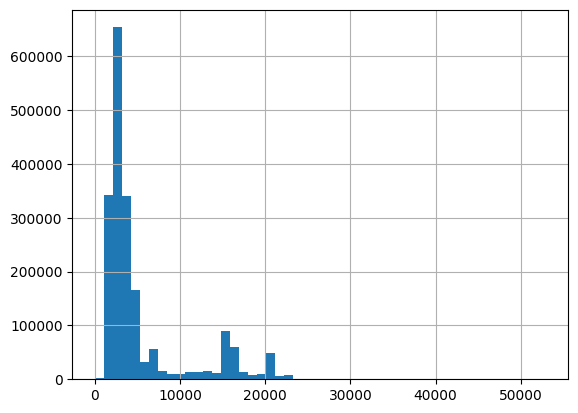

col:  RDDSK


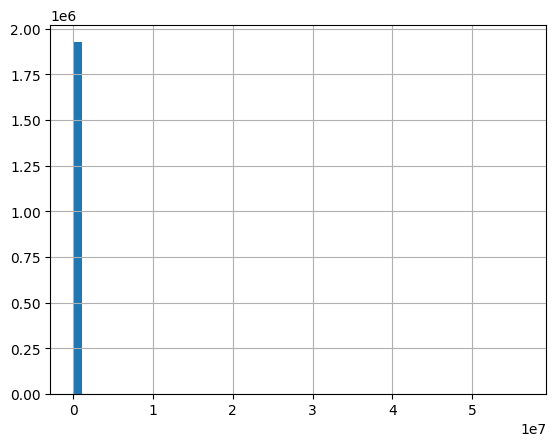

col:  WRDSK


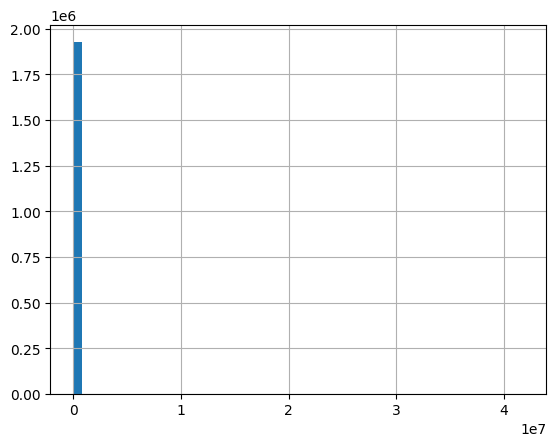

col:  WCANCL


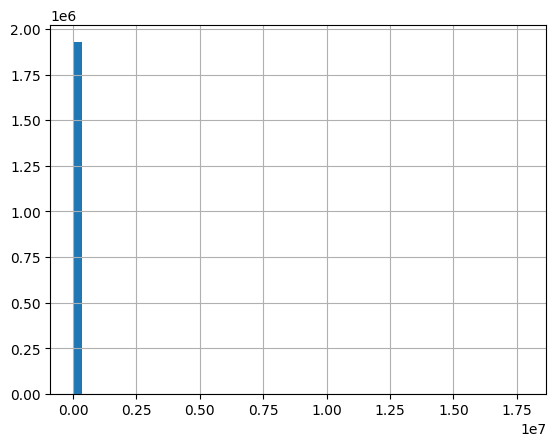

col:  DSK


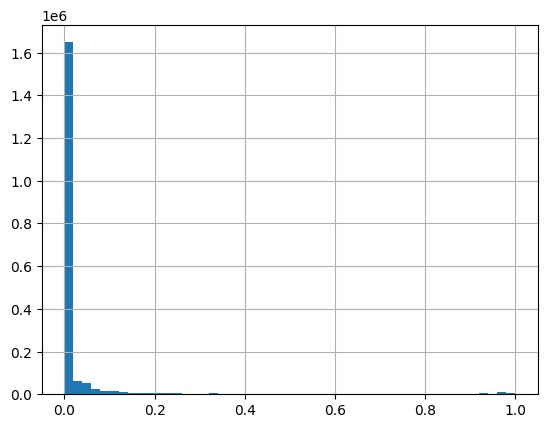

col:  CMD


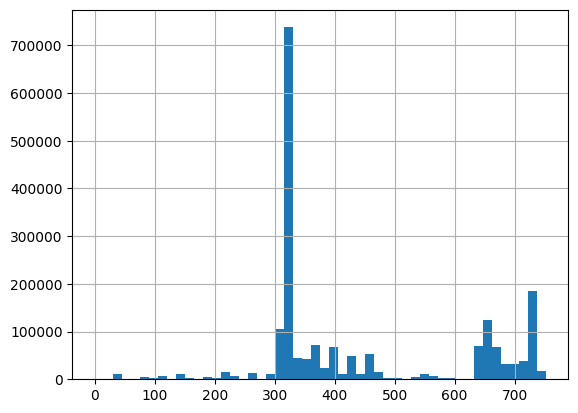

col:  label


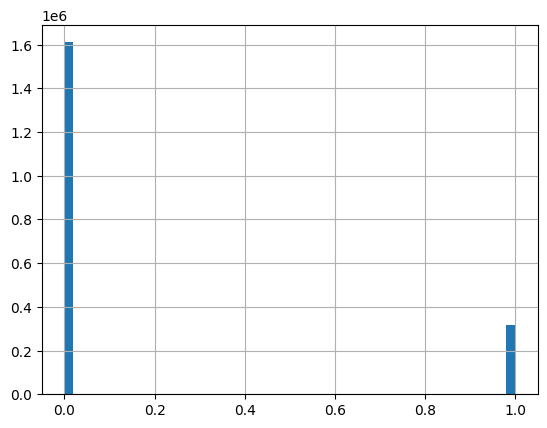

In [35]:
import matplotlib.pyplot as plt
columns = linux_disk.columns
for col in columns:
    print("col: ", col)
    linux_disk[col].hist(bins = 50)
    plt.show()

In [36]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [37]:
from sklearn.metrics import f1_score, accuracy_score

def get_accuracy_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelAccuracyTest = accuracy_score(y_pred,y_test)
    return modelAccuracyTest

def get_f1_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelF1Test = f1_score(y_pred,y_test)
    return modelF1Test

In [38]:
x = linux_disk.drop('label', axis = 1)
y = linux_disk['label']

# Without Oversampling

In [39]:
from sklearn.tree import DecisionTreeClassifier
from statistics import mean
Dtree_accuracy_scores = []
Dtree_f1_scores = []

for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

    Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

print('Accuracy Score: ',mean(Dtree_accuracy_scores))
print('F1 Score:', mean(Dtree_f1_scores))

Accuracy Score:  0.8654735672587566
F1 Score: 0.4916126308675959


# Oversampling

In [40]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 1409384, 1: 277057}
After oversampling {0: 1409384, 1: 1409384}


In [41]:
from sklearn.tree import DecisionTreeClassifier
from statistics import mean
Dtree_accuracy_scores = []
Dtree_f1_scores = []

for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]
    Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

print('Accuracy Score:',mean(Dtree_accuracy_scores))
print('F1 Score:', mean(Dtree_f1_scores))

Accuracy Score: 0.7992314372804005
F1 Score: 0.8025472273403464


# Undersampling

<AxesSubplot: xlabel='label', ylabel='count'>

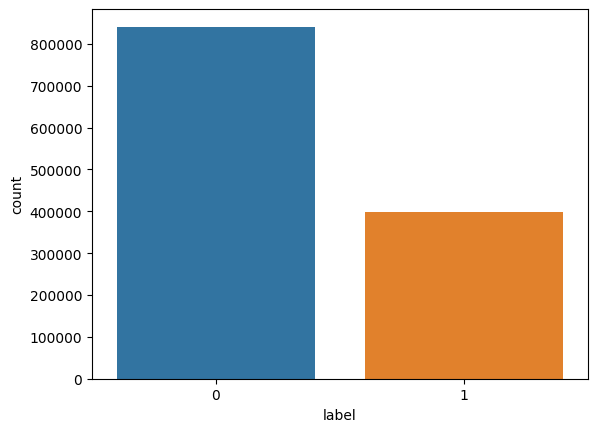

In [42]:
target = 'label'

import numpy as np
minority_class_len = len(linux_disk[linux_disk[target] == 1])
majority_class_indices = linux_disk[linux_disk[target] == 0].index

random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)

minority_class_indices = linux_disk[linux_disk[target] == 1].index

under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])

under_sample = linux_disk.loc[under_sample_indices]

import seaborn as sns
sns.countplot(x = target, data = under_sample)


^for some reason the undersampling is not complete

In [43]:
und_x = under_sample.loc[:, linux_disk.columns !=target]
und_y = under_sample.loc[:, linux_disk.columns == target]

from sklearn.tree import DecisionTreeClassifier
from statistics import mean
Dtree_accuracy_scores = []
Dtree_f1_scores = []

for train_index, test_index in skf.split(und_x, und_y):
    x_train, x_test, y_train, y_test = und_x.iloc[train_index], und_x.iloc[test_index], und_y.iloc[train_index], und_y.iloc[test_index]
    Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

print('Accuracy Score:',mean(Dtree_accuracy_scores))
print('F1 Score:', mean(Dtree_f1_scores))

Accuracy Score: 0.8157332328575403
F1 Score: 0.6779691212102706
